In [5]:
# EDA - PHÂN TÍCH DỮ LIỆU REINTEL DATASET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Thiết lập hiển thị
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)




In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# 1. ĐỌC DỮ LIỆU REINTEL
print("\n🔍 1. TỔNG QUAN DỮ LIỆU")
print("-" * 50)

# Đọc các file CSV
train_df = pd.read_csv('/Users/anhoaithai/Documents/AHT/1. PROJECTS/Research/BGRA2025/Pipeline/reintel_dataset/train.csv')
val_df = pd.read_csv('/Users/anhoaithai/Documents/AHT/1. PROJECTS/Research/BGRA2025/Pipeline/reintel_dataset/val.csv')
test_df = pd.read_csv('/Users/anhoaithai/Documents/AHT/1. PROJECTS/Research/BGRA2025/Pipeline/reintel_dataset/test.csv')

print("📊 KÍCH THƯỚC DATASETS:")
print(f"  📁 Train: {train_df.shape[0]:,} dòng × {train_df.shape[1]} cột")
print(f"  📁 Validation: {val_df.shape[0]:,} dòng × {val_df.shape[1]} cột")
print(f"  📁 Test: {test_df.shape[0]:,} dòng × {test_df.shape[1]} cột")
print(f"  📁 TỔNG: {train_df.shape[0] + val_df.shape[0] + test_df.shape[0]:,} dòng")

print(f"\n📋 CẤU TRÚC CỘT:")
print(f"  Các cột: {list(train_df.columns)}")

print(f"\n📄 THÔNG TIN CHI TIẾT TRAIN DATASET:")
train_df.info()

print(f"\n📊 5 DÒNG ĐẦU TIÊN (TRAIN):")
print(train_df.head())



🔍 1. TỔNG QUAN DỮ LIỆU
--------------------------------------------------
📊 KÍCH THƯỚC DATASETS:
  📁 Train: 8,741 dòng × 7 cột
  📁 Validation: 486 dòng × 7 cột
  📁 Test: 486 dòng × 7 cột
  📁 TỔNG: 9,713 dòng

📋 CẤU TRÚC CỘT:
  Các cột: ['user_name', 'post_message', 'timestamp_post', 'num_like_post', 'num_comment_post', 'num_share_post', 'label']

📄 THÔNG TIN CHI TIẾT TRAIN DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8741 entries, 0 to 8740
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         8741 non-null   object
 1   post_message      8741 non-null   object
 2   timestamp_post    8741 non-null   object
 3   num_like_post     8741 non-null   object
 4   num_comment_post  8741 non-null   object
 5   num_share_post    8741 non-null   object
 6   label             8741 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 478.2+ KB

📊 5 DÒNG ĐẦU TIÊN (TRAIN):
              


🏷️ 2. PHÂN BỐ NHÃN (LABEL DISTRIBUTION)
--------------------------------------------------

📊 TRAIN:
  Real (Thật): 7,269 (83.2%)
  Fake (Giả): 1,472 (16.8%)
  ⚖️  Tỷ lệ: 0.20 (Rất mất cân bằng)

📊 VALIDATION:
  Real (Thật): 404 (83.1%)
  Fake (Giả): 82 (16.9%)
  ⚖️  Tỷ lệ: 0.20 (Rất mất cân bằng)

📊 TEST:
  Real (Thật): 404 (83.1%)
  Fake (Giả): 82 (16.9%)
  ⚖️  Tỷ lệ: 0.20 (Rất mất cân bằng)

📈 TỔNG HỢP TẤT CẢ DATASETS:

📊 TỔNG CỘNG:
  Real (Thật): 8,077 (83.2%)
  Fake (Giả): 1,636 (16.8%)
  ⚖️  Tỷ lệ: 0.20 (Rất mất cân bằng)


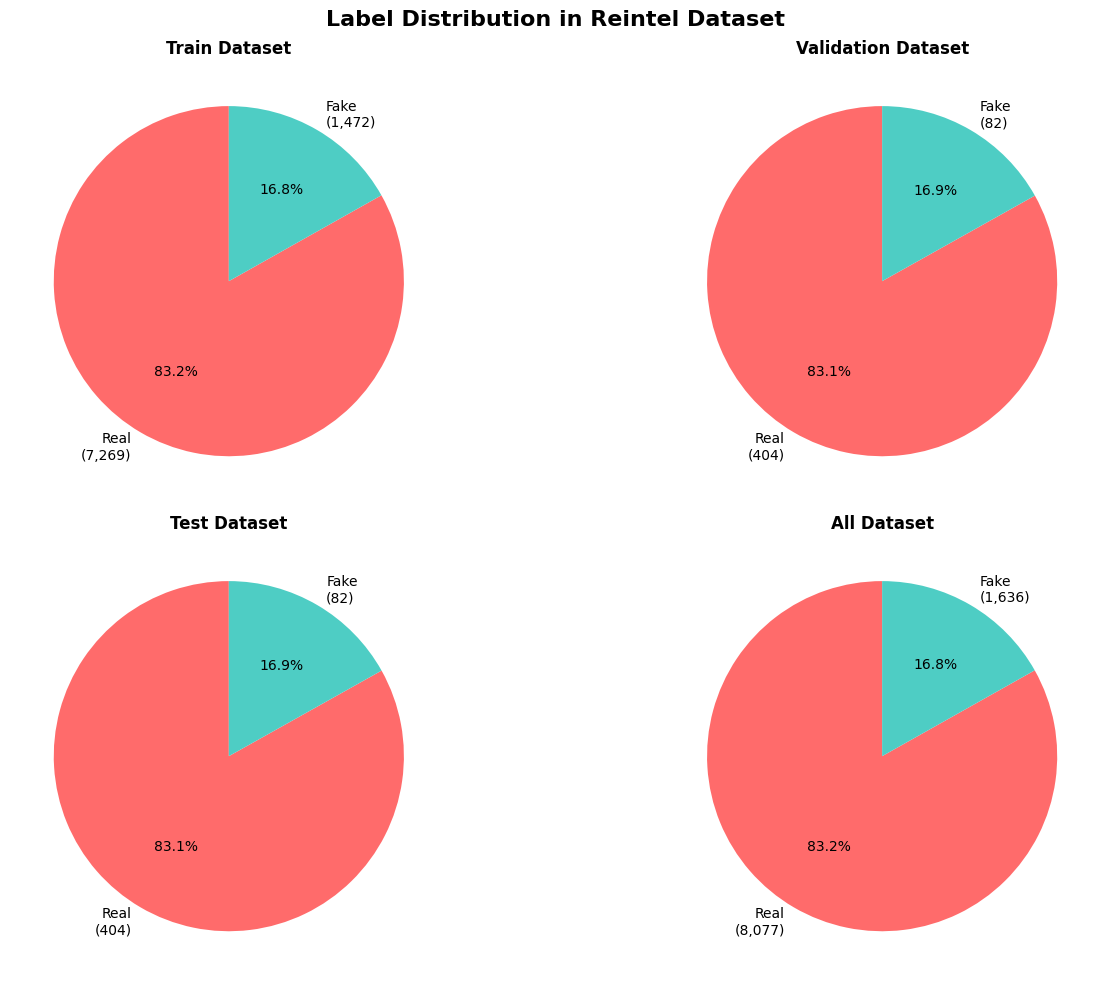


✅ Đã tạo biểu đồ phân bố nhãn!


In [8]:
# 2. PHÂN TÍCH PHÂN BỐ NHÃN
print("\n🏷️ 2. PHÂN BỐ NHÃN (LABEL DISTRIBUTION)")
print("-" * 50)

# Hàm phân tích phân bố nhãn
def analyze_labels(df, dataset_name):
    print(f"\n📊 {dataset_name.upper()}:")
    label_counts = df['label'].value_counts().sort_index()
    total = len(df)

    for label, count in label_counts.items():
        percentage = count / total * 100
        label_name = "Real (Thật)" if label == 0 else "Fake (Giả)"
        print(f"  {label_name}: {count:,} ({percentage:.1f}%)")

    # Kiểm tra cân bằng dữ liệu
    if len(label_counts) == 2:
        ratio = min(label_counts) / max(label_counts)
        balance_status = "Cân bằng" if ratio > 0.8 else "Mất cân bằng" if ratio > 0.5 else "Rất mất cân bằng"
        print(f"  ⚖️  Tỷ lệ: {ratio:.2f} ({balance_status})")

    return label_counts

# Phân tích từng dataset
train_labels = analyze_labels(train_df, "Train")
val_labels = analyze_labels(val_df, "Validation")
test_labels = analyze_labels(test_df, "Test")

# Tổng hợp
print(f"\n📈 TỔNG HỢP TẤT CẢ DATASETS:")
all_data = pd.concat([train_df, val_df, test_df], ignore_index=True)
all_labels = analyze_labels(all_data, "Tổng cộng")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Label Distribution in Reintel Dataset', fontsize=16, fontweight='bold')

datasets = [
    (train_labels, "Train Dataset", axes[0,0]),
    (val_labels, "Validation Dataset", axes[0,1]),
    (test_labels, "Test Dataset", axes[1,0]),
    (all_labels, "All Dataset", axes[1,1])
]

colors = ['#ff6b6b', '#4ecdc4']
for label_counts, title, ax in datasets:
    labels = ['Real', 'Fake']
    values = [label_counts.get(0, 0), label_counts.get(1, 0)]

    wedges, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.1f%%',
                                     colors=colors, startangle=90)
    ax.set_title(title, fontweight='bold')

    # Thêm số lượng vào label
    for i, (label, value) in enumerate(zip(labels, values)):
        texts[i].set_text(f'{label}\n({value:,})')

plt.tight_layout()
plt.show()

print(f"\n✅ Đã tạo biểu đồ phân bố nhãn!")



📅 3. PHÂN TÍCH THỜI GIAN
--------------------------------------------------

🕒 TRAIN:
  Kiểu dữ liệu timestamp: object
  Số giá trị null: 0
  Số timestamp hợp lệ: 8,734
  Thời gian sớm nhất: 1970-01-01 00:00:00
  Thời gian muộn nhất: 2020-09-28 17:48:00
  📊 Phân bố theo năm:
    1970: 277 (3.2%)
    2014: 2 (0.0%)
    2015: 2 (0.0%)
    2016: 2 (0.0%)
    2017: 21 (0.2%)
    2018: 6 (0.1%)
    2019: 46 (0.5%)
    2020: 8,378 (95.9%)

🕒 VALIDATION:
  Kiểu dữ liệu timestamp: object
  Số giá trị null: 0
  Số timestamp hợp lệ: 485
  Thời gian sớm nhất: 1970-01-01 00:00:00
  Thời gian muộn nhất: 2020-08-09 05:00:00
  📊 Phân bố theo năm:
    1970: 11 (2.3%)
    2017: 1 (0.2%)
    2020: 473 (97.5%)

🕒 TEST:
  Kiểu dữ liệu timestamp: object
  Số giá trị null: 0
  Số timestamp hợp lệ: 486
  Thời gian sớm nhất: 1970-01-01 00:00:00
  Thời gian muộn nhất: 2020-09-28 17:48:00
  📊 Phân bố theo năm:
    1970: 11 (2.3%)
    2017: 4 (0.8%)
    2019: 4 (0.8%)
    2020: 467 (96.1%)

📈 TỔNG HỢP THỜI GIAN

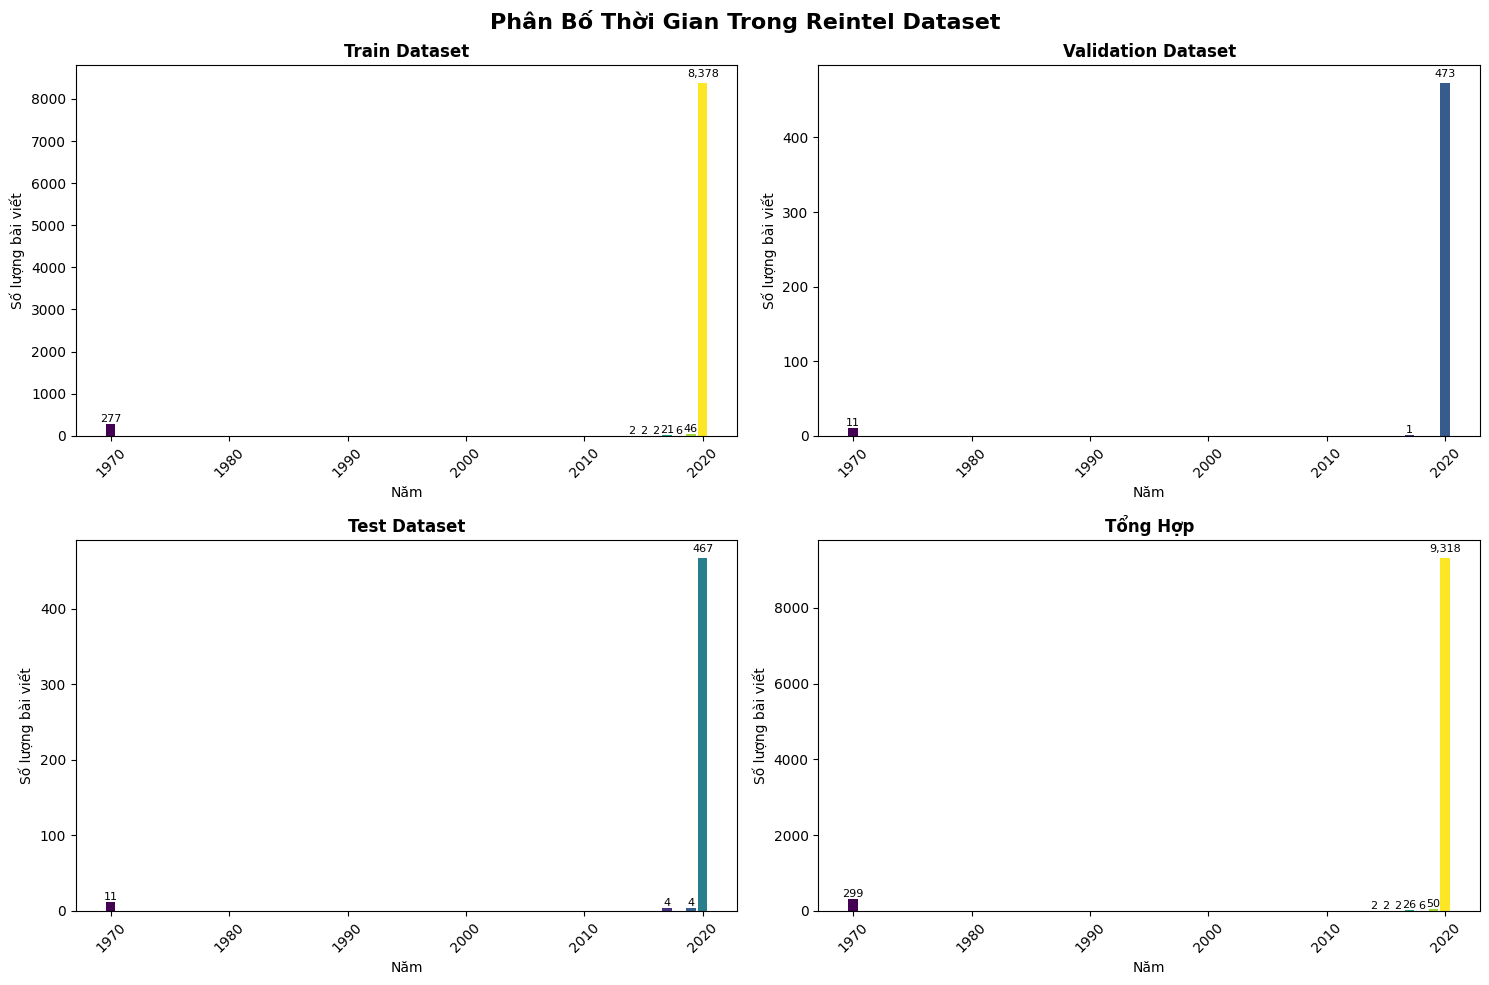


✅ Đã tạo biểu đồ phân bố thời gian!


In [9]:
# 3. PHÂN TÍCH THỜI GIAN (TIMESTAMP)
print("\n📅 3. PHÂN TÍCH THỜI GIAN")
print("-" * 50)

def analyze_timestamps(df, dataset_name):
    print(f"\n🕒 {dataset_name.upper()}:")

    # Kiểm tra kiểu dữ liệu timestamp
    print(f"  Kiểu dữ liệu timestamp: {df['timestamp_post'].dtype}")
    print(f"  Số giá trị null: {df['timestamp_post'].isnull().sum():,}")

    # Chuyển đổi timestamp
    df_temp = df.copy()

    # Xử lý timestamp - có thể là Unix timestamp hoặc datetime string
    timestamps = []
    for ts in df_temp['timestamp_post'].dropna():
        try:
            # Thử parse như Unix timestamp
            if isinstance(ts, (int, float)) or (isinstance(ts, str) and ts.replace('.', '').isdigit()):
                timestamp = pd.to_datetime(float(ts), unit='s')
            else:
                # Thử parse như datetime string
                timestamp = pd.to_datetime(ts)
            timestamps.append(timestamp)
        except:
            timestamps.append(None)

    if timestamps:
        # Loại bỏ None values
        valid_timestamps = [ts for ts in timestamps if ts is not None]

        if valid_timestamps:
            print(f"  Số timestamp hợp lệ: {len(valid_timestamps):,}")
            print(f"  Thời gian sớm nhất: {min(valid_timestamps)}")
            print(f"  Thời gian muộn nhất: {max(valid_timestamps)}")

            # Phân tích theo năm
            years = [ts.year for ts in valid_timestamps]
            year_counts = pd.Series(years).value_counts().sort_index()

            print(f"  📊 Phân bố theo năm:")
            for year, count in year_counts.items():
                percentage = count / len(valid_timestamps) * 100
                print(f"    {year}: {count:,} ({percentage:.1f}%)")

            return valid_timestamps, year_counts

    return [], pd.Series()

# Phân tích timestamp cho từng dataset
train_timestamps, train_years = analyze_timestamps(train_df, "Train")
val_timestamps, val_years = analyze_timestamps(val_df, "Validation")
test_timestamps, test_years = analyze_timestamps(test_df, "Test")

# Tổng hợp
print(f"\n📈 TỔNG HỢP THỜI GIAN:")
all_timestamps = train_timestamps + val_timestamps + test_timestamps
if all_timestamps:
    all_years = pd.Series([ts.year for ts in all_timestamps]).value_counts().sort_index()
    print(f"  Tổng timestamp hợp lệ: {len(all_timestamps):,}")
    print(f"  Khoảng thời gian: {min(all_timestamps)} → {max(all_timestamps)}")
    print(f"  📊 Phân bố tổng theo năm:")
    for year, count in all_years.items():
        percentage = count / len(all_timestamps) * 100
        print(f"    {year}: {count:,} ({percentage:.1f}%)")

# Visualization
if all_timestamps:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Phân Bố Thời Gian Trong Reintel Dataset', fontsize=16, fontweight='bold')

    # Biểu đồ cột phân bố năm
    datasets_time = [
        (train_years, "Train Dataset", axes[0,0]),
        (val_years, "Validation Dataset", axes[0,1]),
        (test_years, "Test Dataset", axes[1,0]),
        (all_years, "Tổng Hợp", axes[1,1])
    ]

    colors = plt.cm.viridis(np.linspace(0, 1, len(all_years)))

    for year_counts, title, ax in datasets_time:
        if not year_counts.empty:
            bars = ax.bar(year_counts.index, year_counts.values, color=colors[:len(year_counts)])
            ax.set_title(title, fontweight='bold')
            ax.set_xlabel('Năm')
            ax.set_ylabel('Số lượng bài viết')
            ax.tick_params(axis='x', rotation=45)

            # Thêm số lượng lên đầu cột
            for bar, count in zip(bars, year_counts.values):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                       f'{count:,}', ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

    print(f"\n✅ Đã tạo biểu đồ phân bố thời gian!")
else:
    print("❌ Không có timestamp hợp lệ để tạo biểu đồ")



📏 4. PHÂN TÍCH ĐỘ DÀI NỘI DUNG
--------------------------------------------------

📝 TRAIN:
  📊 Thống kê độ dài (ký tự):
    Trung bình: 760
    Trung vị: 252
    Độ lệch chuẩn: 1445
    Min: 6
    Max: 28689
    Q1 (25%): 146
    Q3 (75%): 731
  📊 Phân loại theo độ dài:
    Ngắn (50-200): 3,279 (37.5%)
    Trung bình (200-500): 2,505 (28.7%)
    Rất dài (>1000): 1,766 (20.2%)
    Dài (500-1000): 1,004 (11.5%)
    Rất ngắn (<50): 187 (2.1%)
  📊 Độ dài trung bình theo nhãn:
    Real (Thật): TB=751, Trung vị=243
    Fake (Giả): TB=805, Trung vị=301

📝 VALIDATION:
  📊 Thống kê độ dài (ký tự):
    Trung bình: 867
    Trung vị: 243
    Độ lệch chuẩn: 1787
    Min: 5
    Max: 21674
    Q1 (25%): 141
    Q3 (75%): 827
  📊 Phân loại theo độ dài:
    Ngắn (50-200): 177 (36.4%)
    Trung bình (200-500): 123 (25.3%)
    Rất dài (>1000): 109 (22.4%)
    Dài (500-1000): 59 (12.1%)
    Rất ngắn (<50): 18 (3.7%)
  📊 Độ dài trung bình theo nhãn:
    Real (Thật): TB=830, Trung vị=226
    Fake (Giả): T

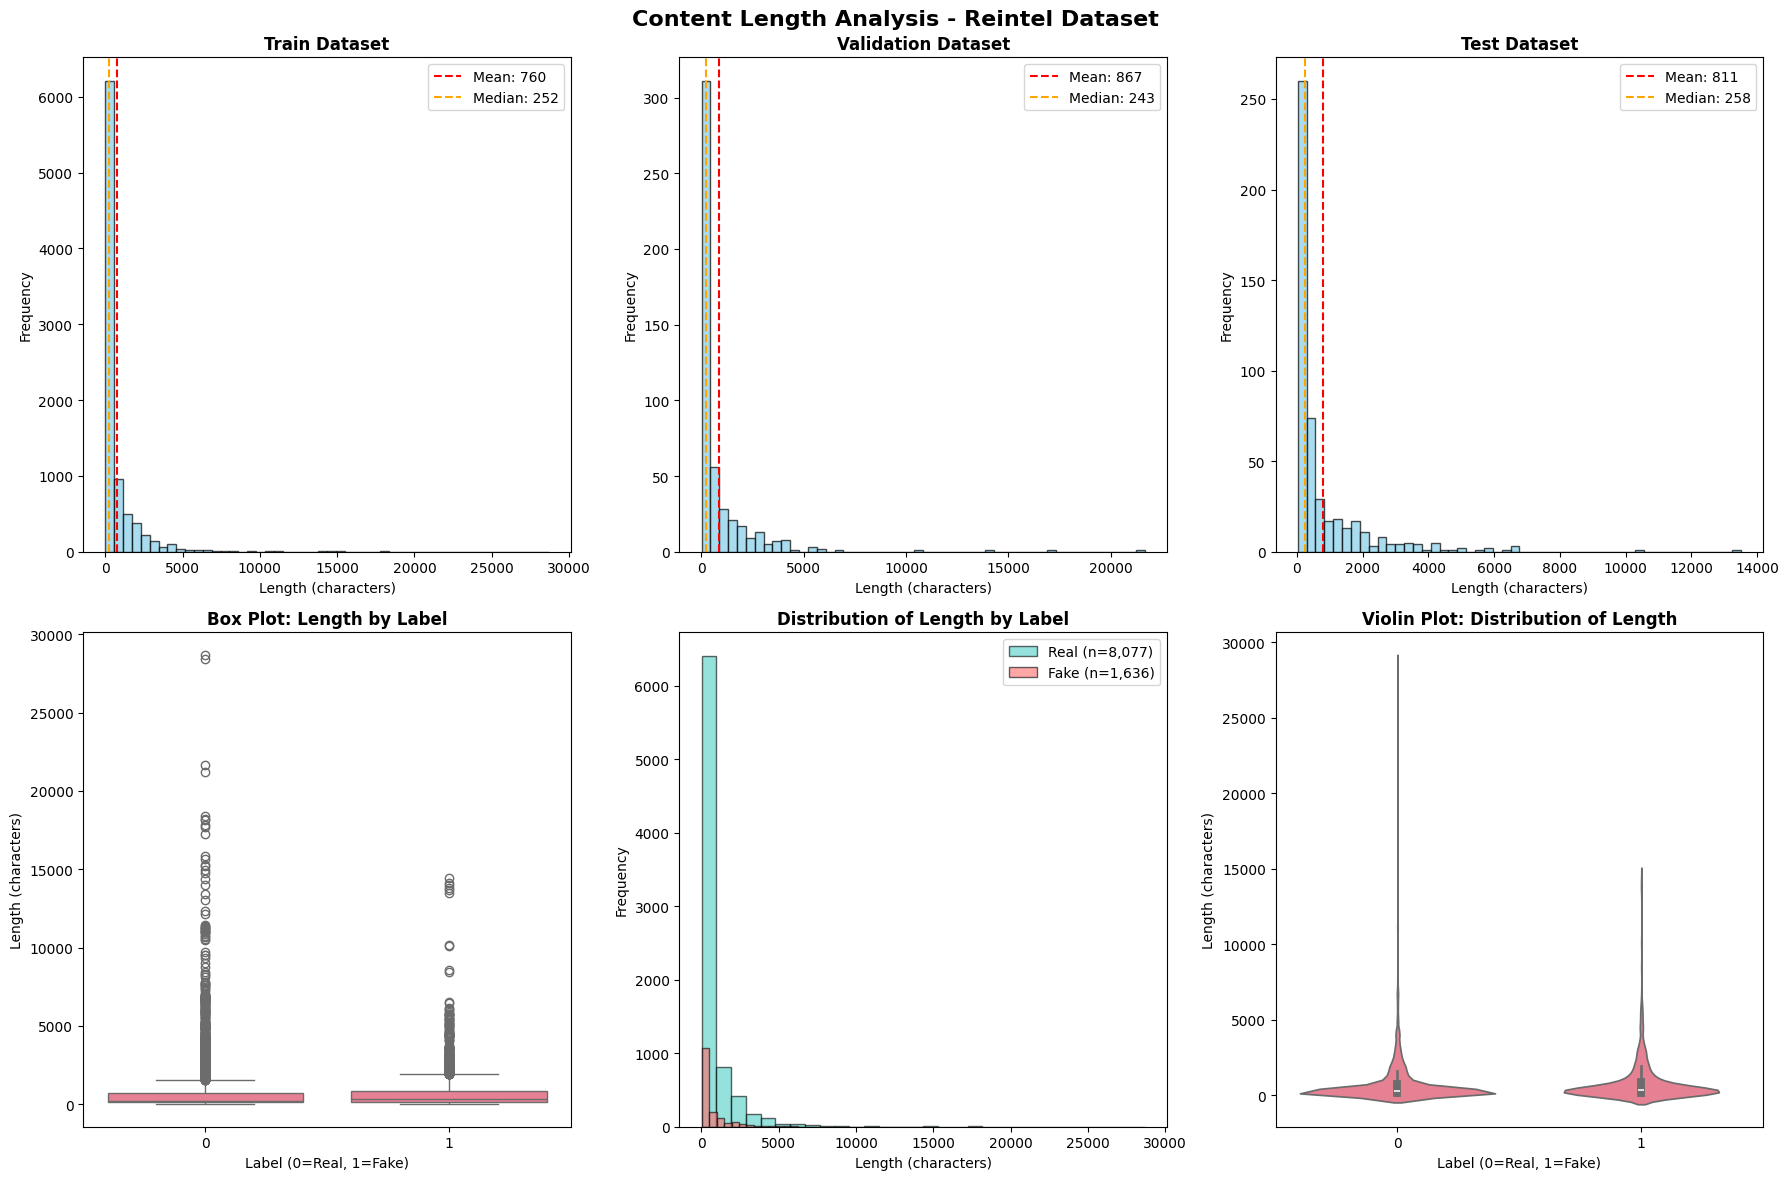


✅ Đã tạo biểu đồ phân tích độ dài nội dung!


In [12]:
# 4. PHÂN TÍCH ĐỘ DÀI NỘI DUNG (POST_MESSAGE)
print("\n📏 4. PHÂN TÍCH ĐỘ DÀI NỘI DUNG")
print("-" * 50)

def analyze_text_length(df, dataset_name):
    print(f"\n📝 {dataset_name.upper()}:")

    # Tính độ dài message
    df_temp = df.copy()
    df_temp['message_length'] = df_temp['post_message'].astype(str).str.len()

    # Thống kê cơ bản
    length_stats = df_temp['message_length'].describe()
    print(f"  📊 Thống kê độ dài (ký tự):")
    print(f"    Trung bình: {length_stats['mean']:.0f}")
    print(f"    Trung vị: {length_stats['50%']:.0f}")
    print(f"    Độ lệch chuẩn: {length_stats['std']:.0f}")
    print(f"    Min: {length_stats['min']:.0f}")
    print(f"    Max: {length_stats['max']:.0f}")
    print(f"    Q1 (25%): {length_stats['25%']:.0f}")
    print(f"    Q3 (75%): {length_stats['75%']:.0f}")

    # Phân loại theo độ dài
    def categorize_length(length):
        if length < 50:
            return "Rất ngắn (<50)"
        elif length < 200:
            return "Ngắn (50-200)"
        elif length < 500:
            return "Trung bình (200-500)"
        elif length < 1000:
            return "Dài (500-1000)"
        else:
            return "Rất dài (>1000)"

    df_temp['length_category'] = df_temp['message_length'].apply(categorize_length)
    length_cat_counts = df_temp['length_category'].value_counts()

    print(f"  📊 Phân loại theo độ dài:")
    for category, count in length_cat_counts.items():
        percentage = count / len(df_temp) * 100
        print(f"    {category}: {count:,} ({percentage:.1f}%)")

    # Phân tích theo nhãn
    if 'label' in df_temp.columns:
        print(f"  📊 Độ dài trung bình theo nhãn:")
        for label in sorted(df_temp['label'].unique()):
            subset = df_temp[df_temp['label'] == label]
            avg_length = subset['message_length'].mean()
            median_length = subset['message_length'].median()
            label_name = "Real (Thật)" if label == 0 else "Fake (Giả)"
            print(f"    {label_name}: TB={avg_length:.0f}, Trung vị={median_length:.0f}")

    return df_temp['message_length'], length_cat_counts

# Phân tích độ dài cho từng dataset
train_lengths, train_cat = analyze_text_length(train_df, "Train")
val_lengths, val_cat = analyze_text_length(val_df, "Validation")
test_lengths, test_cat = analyze_text_length(test_df, "Test")

# Tổng hợp
print(f"\n📈 TỔNG HỢP ĐỘ DÀI:")
all_lengths = pd.concat([train_lengths, val_lengths, test_lengths], ignore_index=True)
overall_stats = all_lengths.describe()
print(f"  Trung bình tổng: {overall_stats['mean']:.0f} ký tự")
print(f"  Trung vị tổng: {overall_stats['50%']:.0f} ký tự")
print(f"  Khoảng: {overall_stats['min']:.0f} - {overall_stats['max']:.0f} ký tự")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Content Length Analysis - Reintel Dataset', fontsize=16, fontweight='bold')

# Histograms
datasets_length = [
    (train_lengths, "Train Dataset", axes[0,0]),
    (val_lengths, "Validation Dataset", axes[0,1]),
    (test_lengths, "Test Dataset", axes[0,2])
]

for lengths, title, ax in datasets_length:
    ax.hist(lengths, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel('Length (characters)')
    ax.set_ylabel('Frequency')
    ax.axvline(lengths.mean(), color='red', linestyle='--', label=f'Mean: {lengths.mean():.0f}')
    ax.axvline(lengths.median(), color='orange', linestyle='--', label=f'Median: {lengths.median():.0f}')
    ax.legend()

# Box plots theo nhãn
all_data_with_length = pd.concat([train_df, val_df, test_df], ignore_index=True)
all_data_with_length['message_length'] = all_data_with_length['post_message'].astype(str).str.len()

# Box plot tổng hợp
sns.boxplot(data=all_data_with_length, x='label', y='message_length', ax=axes[1,0])
axes[1,0].set_title('Box Plot: Length by Label', fontweight='bold')
axes[1,0].set_xlabel('Label (0=Real, 1=Fake)')
axes[1,0].set_ylabel('Length (characters)')

# Histogram tổng hợp với phân tách theo nhãn
for label in [0, 1]:
    subset = all_data_with_length[all_data_with_length['label'] == label]
    label_name = "Real" if label == 0 else "Fake"
    color = '#ff6b6b' if label == 1 else '#4ecdc4'
    axes[1,1].hist(subset['message_length'], bins=30, alpha=0.6,
                   label=f'{label_name} (n={len(subset):,})', color=color, edgecolor='black')

axes[1,1].set_title('Distribution of Length by Label', fontweight='bold')
axes[1,1].set_xlabel('Length (characters)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

# Violin plot
sns.violinplot(data=all_data_with_length, x='label', y='message_length', ax=axes[1,2])
axes[1,2].set_title('Violin Plot: Distribution of Length', fontweight='bold')
axes[1,2].set_xlabel('Label (0=Real, 1=Fake)')
axes[1,2].set_ylabel('Length (characters)')

plt.tight_layout()
plt.show()

print(f"\n✅ Đã tạo biểu đồ phân tích độ dài nội dung!")



🔍 5. PHÂN TÍCH TRÙNG LẶP VÀ CHẤT LƯỢNG DỮ LIỆU
--------------------------------------------------
🔍 KIỂM TRA TRÙNG LẶP TỪNG DATASET:

📊 TRAIN:
  📝 Message:
    Tổng số: 8,741
    Unique: 8,741
    Trùng lặp: 0 (0.00%)
  👤 User:
    Tổng số: 8,741
    Unique: 3,567
    Trùng lặp: 5,174
  ❌ Null values:

📊 VALIDATION:
  📝 Message:
    Tổng số: 486
    Unique: 486
    Trùng lặp: 0 (0.00%)
  👤 User:
    Tổng số: 486
    Unique: 391
    Trùng lặp: 95
  ❌ Null values:

📊 TEST:
  📝 Message:
    Tổng số: 486
    Unique: 486
    Trùng lặp: 0 (0.00%)
  👤 User:
    Tổng số: 486
    Unique: 411
    Trùng lặp: 75
  ❌ Null values:

🚨 KIỂM TRA DATA LEAKAGE GIỮA CÁC SPLIT:
--------------------------------------------------
📊 Kết quả kiểm tra:
  Train ∩ Val: 0 message
  Train ∩ Test: 0 message
  Val ∩ Test: 0 message
  Train ∩ Val ∩ Test: 0 message

✅ TUYỆT VỜI: Không có data leakage giữa các split!


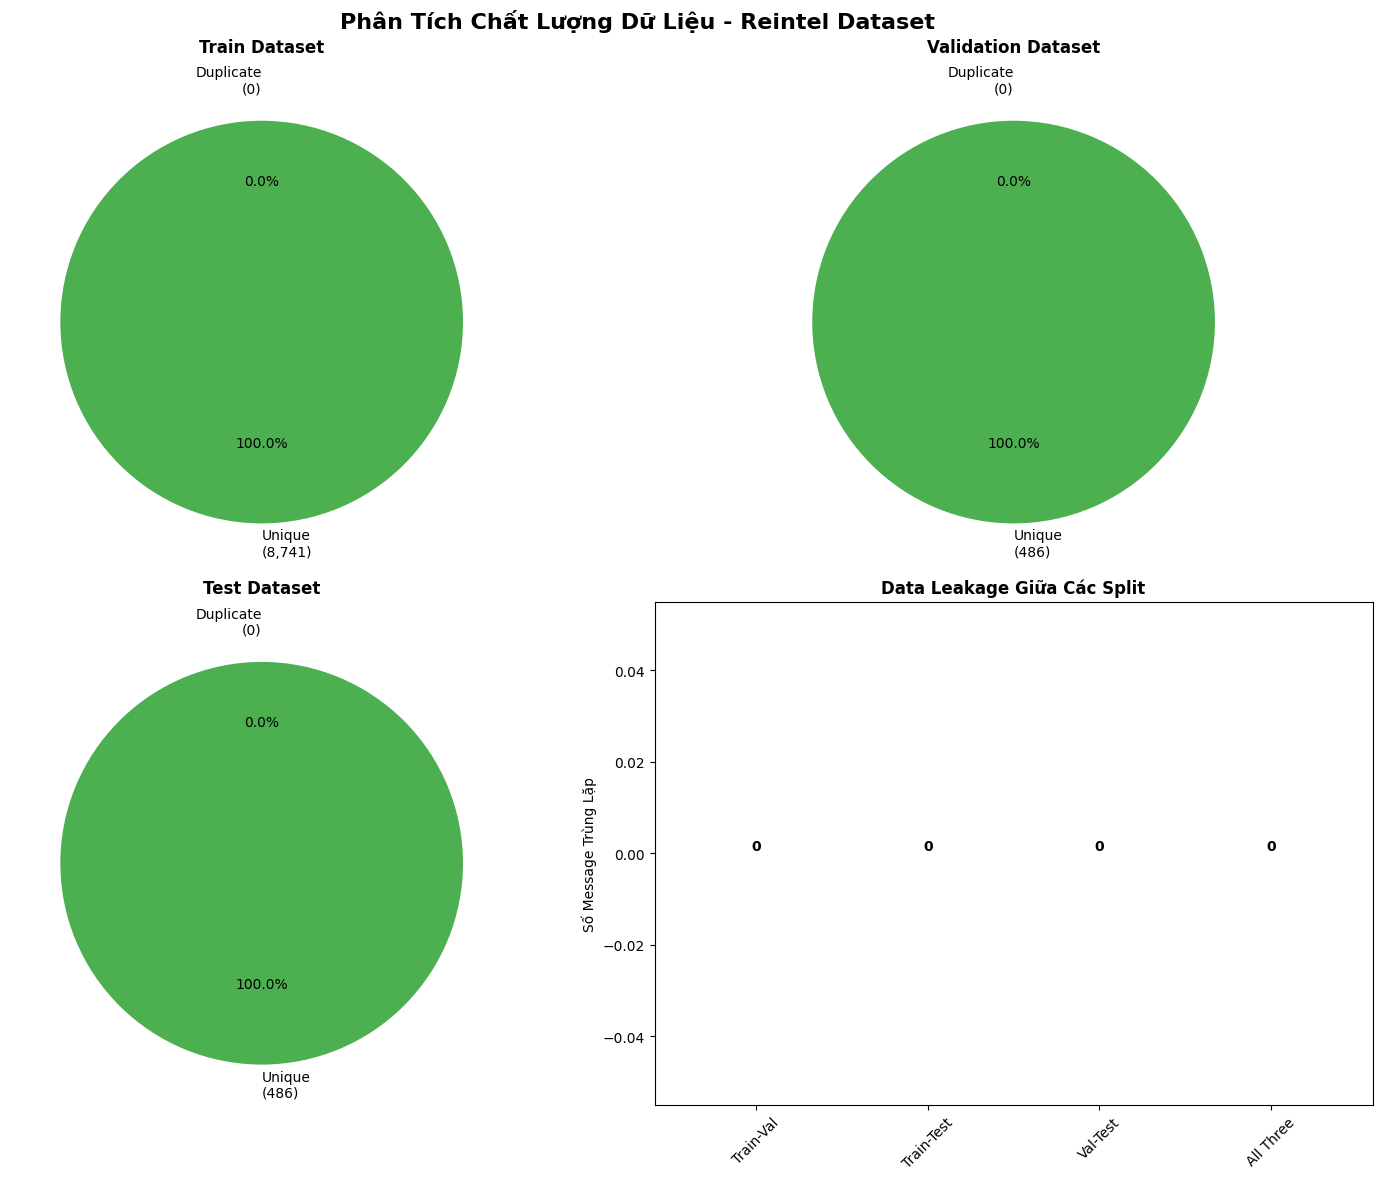


📋 TÓM TẮT CHẤT LƯỢNG DỮ LIỆU:
--------------------------------------------------
📊 Tổng hợp toàn bộ dataset:
  Tổng số message: 9,713
  Message unique: 9,713
  Message trùng lặp: 0 (0.00%)
  Tỷ lệ chất lượng: 100.0%

💡 KHUYẾN NGHỊ:
  ✅ Dataset có chất lượng tốt, sẵn sàng để training!

✅ Hoàn thành phân tích chất lượng dữ liệu!


In [11]:
# 5. PHÂN TÍCH TRÙNG LẶP VÀ CHẤT LƯỢNG DỮ LIỆU
print("\n🔍 5. PHÂN TÍCH TRÙNG LẶP VÀ CHẤT LƯỢNG DỮ LIỆU")
print("-" * 50)

def check_duplicates(df, dataset_name):
    print(f"\n📊 {dataset_name.upper()}:")

    # Kiểm tra trùng lặp message
    total_messages = len(df)
    unique_messages = df['post_message'].nunique()
    duplicate_count = total_messages - unique_messages

    print(f"  📝 Message:")
    print(f"    Tổng số: {total_messages:,}")
    print(f"    Unique: {unique_messages:,}")
    print(f"    Trùng lặp: {duplicate_count:,} ({duplicate_count/total_messages*100:.2f}%)")

    # Tìm message trùng lặp nhiều nhất
    if duplicate_count > 0:
        message_counts = df['post_message'].value_counts()
        duplicated_messages = message_counts[message_counts > 1]
        print(f"    Message trùng nhiều nhất: {duplicated_messages.iloc[0]} lần")
        print(f"    Số message bị trùng: {len(duplicated_messages)}")

        # Hiển thị top 3 message trùng lặp
        print(f"    Top 3 message trùng lặp:")
        for i, (msg, count) in enumerate(duplicated_messages.head(3).items()):
            print(f"      {i+1}. [{count} lần] {msg[:100]}...")

    # Kiểm tra trùng lặp user_name
    total_users = len(df)
    unique_users = df['user_name'].nunique()

    print(f"  👤 User:")
    print(f"    Tổng số: {total_users:,}")
    print(f"    Unique: {unique_users:,}")
    print(f"    Trùng lặp: {total_users - unique_users:,}")

    # Kiểm tra null values
    print(f"  ❌ Null values:")
    null_summary = df.isnull().sum()
    for col, null_count in null_summary.items():
        if null_count > 0:
            null_pct = null_count / len(df) * 100
            print(f"    {col}: {null_count:,} ({null_pct:.1f}%)")

    return duplicate_count, duplicated_messages if duplicate_count > 0 else pd.Series()

# Kiểm tra từng dataset
print("🔍 KIỂM TRA TRÙNG LẶP TỪNG DATASET:")
train_dup, train_dup_msgs = check_duplicates(train_df, "Train")
val_dup, val_dup_msgs = check_duplicates(val_df, "Validation")
test_dup, test_dup_msgs = check_duplicates(test_df, "Test")

# Kiểm tra data leakage giữa các split
print(f"\n🚨 KIỂM TRA DATA LEAKAGE GIỮA CÁC SPLIT:")
print("-" * 50)

train_messages = set(train_df['post_message'].dropna())
val_messages = set(val_df['post_message'].dropna())
test_messages = set(test_df['post_message'].dropna())

# Tìm overlap
train_val_overlap = train_messages.intersection(val_messages)
train_test_overlap = train_messages.intersection(test_messages)
val_test_overlap = val_messages.intersection(test_messages)
all_three_overlap = train_messages.intersection(val_messages).intersection(test_messages)

print(f"📊 Kết quả kiểm tra:")
print(f"  Train ∩ Val: {len(train_val_overlap):,} message")
print(f"  Train ∩ Test: {len(train_test_overlap):,} message")
print(f"  Val ∩ Test: {len(val_test_overlap):,} message")
print(f"  Train ∩ Val ∩ Test: {len(all_three_overlap):,} message")

# Cảnh báo data leakage
total_leakage = len(train_val_overlap) + len(train_test_overlap) + len(val_test_overlap)
if total_leakage > 0:
    print(f"\n⚠️  CẢNH BÁO: Phát hiện {total_leakage:,} trường hợp data leakage!")
    print(f"   Có thể ảnh hưởng đến độ tin cậy của model evaluation")

    if len(train_test_overlap) > 0:
        print(f"   🔴 NGHIÊM TRỌNG: {len(train_test_overlap):,} message trùng giữa Train-Test")
        print(f"   Ví dụ overlap Train-Test:")
        for i, msg in enumerate(list(train_test_overlap)[:3]):
            print(f"     {i+1}. {msg[:100]}...")
else:
    print(f"\n✅ TUYỆT VỜI: Không có data leakage giữa các split!")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Phân Tích Chất Lượng Dữ Liệu - Reintel Dataset', fontsize=16, fontweight='bold')

# Pie chart: Unique vs Duplicate messages
datasets_quality = [
    (train_df, "Train Dataset", axes[0,0]),
    (val_df, "Validation Dataset", axes[0,1]),
    (test_df, "Test Dataset", axes[1,0])
]

for df, title, ax in datasets_quality:
    total = len(df)
    unique = df['post_message'].nunique()
    duplicate = total - unique

    sizes = [unique, duplicate]
    labels = [f'Unique\n({unique:,})', f'Duplicate\n({duplicate:,})']
    colors = ['#4CAF50', '#f44336']
    explode = (0.05, 0.05)

    wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors,
                                     autopct='%1.1f%%', explode=explode, startangle=90)
    ax.set_title(title, fontweight='bold')

# Data Leakage visualization
leakage_data = {
    'Train-Val': len(train_val_overlap),
    'Train-Test': len(train_test_overlap),
    'Val-Test': len(val_test_overlap),
    'All Three': len(all_three_overlap)
}

bars = axes[1,1].bar(leakage_data.keys(), leakage_data.values(),
                     color=['orange', 'red', 'purple', 'darkred'])
axes[1,1].set_title('Data Leakage Giữa Các Split', fontweight='bold')
axes[1,1].set_ylabel('Số Message Trùng Lặp')
axes[1,1].tick_params(axis='x', rotation=45)

# Thêm số lượng lên đầu cột
for bar, count in zip(bars, leakage_data.values()):
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                   f'{count:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\n📋 TÓM TẮT CHẤT LƯỢNG DỮ LIỆU:")
print("-" * 50)
all_data_quality = pd.concat([train_df, val_df, test_df], ignore_index=True)
total_all = len(all_data_quality)
unique_all = all_data_quality['post_message'].nunique()
duplicate_all = total_all - unique_all

print(f"📊 Tổng hợp toàn bộ dataset:")
print(f"  Tổng số message: {total_all:,}")
print(f"  Message unique: {unique_all:,}")
print(f"  Message trùng lặp: {duplicate_all:,} ({duplicate_all/total_all*100:.2f}%)")
print(f"  Tỷ lệ chất lượng: {unique_all/total_all*100:.1f}%")

print(f"\n💡 KHUYẾN NGHỊ:")
if total_leakage > 0:
    print(f"  🔴 Cần xử lý data leakage trước khi training")
    print(f"  🔧 Loại bỏ {len(train_test_overlap):,} message trùng Train-Test")
if duplicate_all > 0:
    print(f"  🟡 Có thể cân nhắc deduplicate {duplicate_all:,} message trùng lặp")
if duplicate_all == 0 and total_leakage == 0:
    print(f"  ✅ Dataset có chất lượng tốt, sẵn sàng để training!")

print(f"\n✅ Hoàn thành phân tích chất lượng dữ liệu!")
